In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.cross_validation import train_test_split
import random
from sklearn.metrics import log_loss
from math import exp
import xgboost as xgb
from XGBoostPackage import xgbClass
from CrossValidation import CVScore
# from difflib import SequenceMatcher
import editdistance
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline
%pylab inline
sns.set_style("whitegrid")
from sklearn import preprocessing

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'exp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
X_train = pd.read_json("../input/train.json")
X_test = pd.read_json("../input/test.json")
X_train.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
interest_level_map = {'low': 0, 'medium': 1, 'high': 2}
X_train['interest_level'] = X_train['interest_level'].apply(lambda x: interest_level_map[x])
X_test['interest_level'] = -1

In [4]:
# rg.search([X_train.iloc[0]['latitude'],X_train.iloc[0]['longitude']])
# df=pd.DataFrame()
# df['borough']=\
#    X_train[:10].apply(lambda x: rg.search([x['latitude'],x['longitude']])[0]['name'],axis=1)
# df

In [5]:
# MTA_info=pd.read_table("subway_stations.txt")

In [6]:
# MTA=pd.DataFrame()
# MTA['latitude']=MTA_info[MTA_info.columns[0]].apply(lambda x: float(str(x).split(',')[3])).unique()
# MTA['longitude']=MTA_info[MTA_info.columns[0]].apply(lambda x: float(str(x).split(',')[4])).unique()
# MTA
#MTA_info=MTA_info[['latitude','longitude']]

In [42]:
import reverse_geocoder as rg

In [7]:
def printData(X=X_train, name='train'):
    t0=time.time()
    df=pd.DataFrame()
    df['city']=X[:].apply(lambda x: rg.search([x['latitude'],x['longitude']])[0]['name'],axis=1)
    print(time.time()-t0)
    df.to_csv("city_"+name+".csv", index = False, header = True)
# X=X_train[['latitude','longitude']]
# printData(X,'train')

In [8]:
X=X_test[['latitude','longitude']]
printData(X,'test')

Loading formatted geocoded file...


KeyboardInterrupt: 

In [12]:
# x=[1,2]
# MTA.apply(lambda y: np.sqrt((y['latitude']-x[0])**2+(y['longitude']-x[1])**2),axis=1).min()

In [11]:
# def printData(X=X_train, name='train',MTA=MTA):
#     t0=time()
#     df=pd.DataFrame()
#     df['borough']=X[:].apply(lambda x: str(geolocator.reverse([x['latitude'],x['longitude']])).split(', ')[2],axis=1)
#     df['county']=X[:].apply(lambda x: str(geolocator.reverse([x['latitude'],x['longitude']])).split(', ')[3],axis=1)
#     def dist_to_subway(x):
#         return MTA.apply(lambda y: np.sqrt((y['latitude']-x[0])**2+(y['longitude']-x[1])**2),axis=1).min()
#     df['dist_to_subway']=X[:].apply(lambda x: dist_to_subway([x['latitude'],x['longitude']]),axis=1)
#     print(time()-t0)
#     df.to_csv("Borough_County_"+name+".csv", index = False, header = True)
# X=X_train[['latitude','longitude']]
# printData(X,'train')


KeyboardInterrupt: 

In [8]:
# type(geolocator.reverse([X_train.loc[10,'latitude'],X_train.loc[10,'longitude']]).address)

In [11]:
# pd.DataFrame(columns=['borough','county']).to_csv("Borough_County_"+'train'+".csv", index = False, header = True)

In [52]:
# def printData(X=X_train, name='train',MTA=MTA):
#     t0=time()
#     df=pd.DataFrame()
# #     df['tmpStr']=X[:].apply(lambda x: str(geolocator.reverse([x['latitude'],x['longitude']])),axis=1)
# #     df['borough']=df['tmpStr'].apply(lambda x: x.split(', ')[2])
# #     df['county']=df['tmpStr'].apply(lambda x: x.split(', ')[3])
# #     del df['tmpStr']
#     def dist_to_subway(x):
#         return MTA.apply(lambda y: np.sqrt((y['latitude']-x[0])**2+(y['longitude']-x[1])**2),axis=1).min()
#     df['dist_to_subway']=X[:].apply(lambda x: dist_to_subway([x['latitude'],x['longitude']]),axis=1)
#     print(time()-t0)
#     df.to_csv("dist_to_subway_"+name+".csv", index = False, header = True)
# X=X_train[['latitude','longitude']]
# printData(X,'train')
# X=X_test[['latitude','longitude']]
# printData(X,'test')

NameError: name 'MTA' is not defined

In [3]:
tmpdf=pd.read_csv('dist_to_subway_train.csv')
tmpdf.describe()

,dist_to_subway
count,49352.000000
mean,0.027349
std,1.334583
min,0.000046
25%,0.002015
50%,0.003236
75%,0.005195
max,84.193492


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a3f29d0>]], dtype=object)

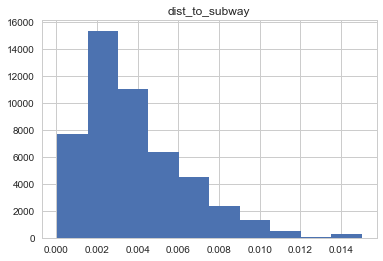

In [17]:
tmpdf.clip_upper(.015).hist()

In [6]:
X_train[X_train['dist_to_subway']>.2]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,dist_to_subway
100346,1.0,1,e9f8fbe6cce51fe5e4418e1828bc6546,2016-04-15 02:52:24,"When you choose Infinity, you'll move into an ...",201 Commons Park,"[Fitness Center, Outdoor Pool, Residents Loung...",0,41.0412,6875908,-73.5400,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/6875908_34ef0687...,2195,201 Commons Park,0.328577
102756,1.0,0,abdc40a80dc42f32e02d10d3e629253e,2016-04-12 03:48:49,,Marshall Street,[],1,40.7291,6859573,-74.2224,782b04129d661ae064fe013aeb297ace,[https://photos.renthop.com/2/6859573_6ca2527f...,695,12 Marshall Street,0.209731
104822,1.0,0,437454e6d44ae7c94f60b1b6507d084a,2016-04-16 02:10:48,NEWLY RENOVATED BEAUTIFUL SPACIOUS HUGE STUDIO...,"E 46th St,","[Doorman, Elevator, Walk in Closet(s), High Ce...",0,39.8395,6881361,-86.1527,8439c2c1ab6949a7447b00971e2f73a9,[https://photos.renthop.com/2/6881361_f8efe79e...,2650,"235 E 46th St,",12.146709
106350,5.0,6,0,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,"[Garden/Patio, Terrace, No Fee, Outdoor Space,...",0,0.0000,6888639,0.0000,c639a76f31c41923cd91d23875a72264,[https://photos.renthop.com/2/6888639_87eb648f...,9995,259 Decatur Street,84.193492
108994,1.0,0,0,2016-04-03 17:08:55,"Sunny, spacious garden level studio apartment ...",268 Bainbridge Street,"[Common Outdoor Space, Private Outdoor Space, ...",0,40.1159,6819739,-74.6267,8e75480baef379386edc3880bba576fd,[https://photos.renthop.com/2/6819739_79b1aee8...,1650,268 Bainbridge Street,0.778286
109507,3.0,3,95fabd330f806524ae62115264f1f840,2016-04-06 16:47:50,EXQUISITE BROWNSTONE** ORIGINAL PRE WAR ** HUG...,Halsey St and Nostrand Avenue,"[Private Outdoor Space, No Fee, Fitness Center...",0,40.6616,6834715,-74.6637,c3d876f112646134464b3b5635c15549,[https://photos.renthop.com/2/6834715_047d10c3...,4400,57 Halsey St,0.634420
109644,2.0,2,69111122f465f6d186a7c750282b9d06,2016-04-15 02:53:26,This property is designed for the professional...,101 Washington Boulevard,"[Fitness Center, Outdoor Pool, Residents Loung...",0,41.0411,6875929,-73.5423,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/6875929_c440766e...,2205,101 Washington Boulevard,0.326496
113552,1.0,0,abdc40a80dc42f32e02d10d3e629253e,2016-04-13 04:20:52,,Marshall Street,[],1,40.7291,6865783,-74.2224,782b04129d661ae064fe013aeb297ace,[https://photos.renthop.com/2/6865783_9ec986f5...,695,12 Marshall Street,0.209731
113599,1.0,0,abdc40a80dc42f32e02d10d3e629253e,2016-04-06 05:24:27,,Marshall Street,[],1,40.7291,6831246,-74.2224,782b04129d661ae064fe013aeb297ace,[https://photos.renthop.com/2/6831246_ab971bf6...,695,12 Marshall Street,0.209731
114028,1.0,1,6869a3c2a96003e9992d6cd1c3c4b299,2016-04-07 01:41:55,Come for the studio apartment but stay for all...,Modern Studio in Amenity Filled 24 Hr. DM Bldg.,"[Cats Allowed, Dogs Allowed, Doorman, Elevator...",0,40.0450,6836479,-75.5214,c3b7c269756b10a84641f04868f30db1,[https://photos.renthop.com/2/6836479_2a5daff5...,2895,271 West 47TH Street,1.596375


In [9]:
def readDist(X=X_train, name='train'):
    df=pd.read_csv("dist_to_subway_"+name+".csv")
    df.index=X.index
    X['dist_to_subway']=df['dist_to_subway']#.apply(lambda x: 2 if x>.2 else 0 if x<.015 else 1)
    del df
readDist(X_train, 'train')
readDist(X_test,'test')

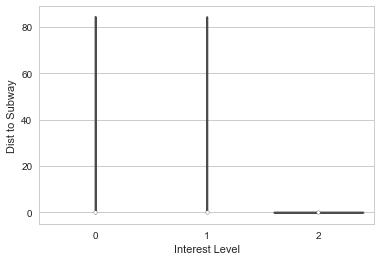

In [10]:
sns.violinplot(x="interest_level", y="dist_to_subway", order=[0, 1 ,2],
            data=X_train)
plt.xlabel('Interest Level');
plt.ylabel('Dist to Subway');

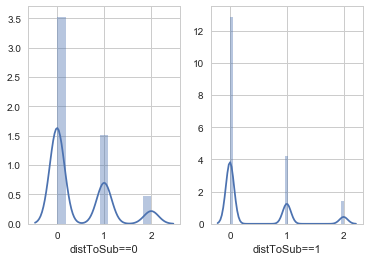

In [11]:
sns.distplot(X_train[X_train['dist_to_subway']>.01]['interest_level'],ax=plt.subplot(121));
plt.xlabel('distToSub==0');
sns.distplot(X_train[X_train['dist_to_subway']<.01]['interest_level'],ax=plt.subplot(122));
plt.xlabel('distToSub==1');
# sns.distplot(X_train[X_train['dist_to_subway']==2]['interest_level'],ax=plt.subplot(133));
# plt.xlabel('distToSub==2');

In [13]:
def addCity(X=X_train, name='train'):
    df=pd.read_csv("city_"+name+".csv")
    df.index=X.index
    X['city']=df['city']
    del df
addCity(X_train, 'train')

In [9]:
a=X_train.groupby('city').count().sort(['bedrooms'])['bedrooms']
print(len(a))
print(a[-10:])
a=a.index[-10:,]
a

63
city
Borough of Queens      484
East New York          491
Guttenberg             673
Inwood                1086
Edgewater             1280
Brooklyn              1782
Weehawken             3613
Long Island City      8980
New York City        14107
Manhattan            15510
Name: bedrooms, dtype: int64


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Index([u'Borough of Queens', u'East New York', u'Guttenberg', u'Inwood',
       u'Edgewater', u'Brooklyn', u'Weehawken', u'Long Island City',
       u'New York City', u'Manhattan'],
      dtype='object', name=u'city')

(-74.02, -73.9)

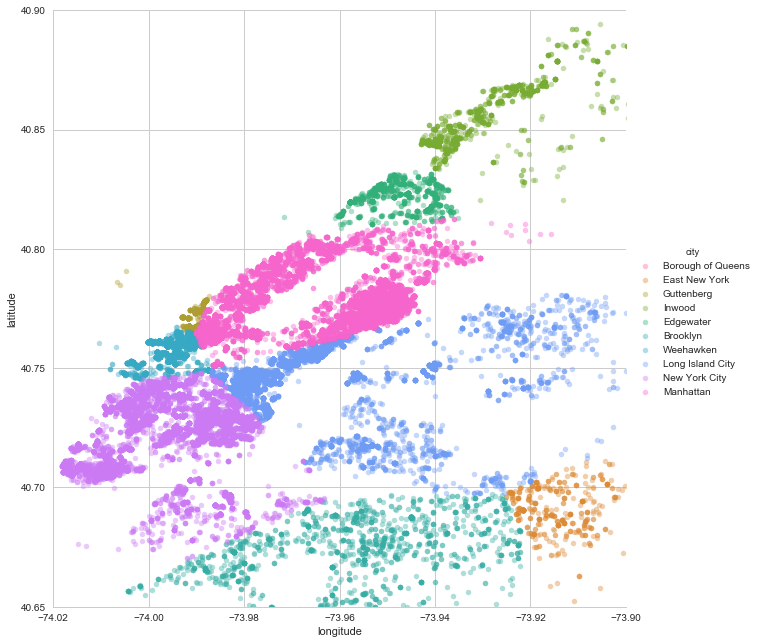

In [53]:
sns.lmplot(x="longitude", y="latitude", scatter_kws={'alpha':.4,'s':30}, \
           size=9, fit_reg=False, hue="city", hue_order=a, \
           data=X_train[:])
axes=plt.gca()
axes.set_ylim([40.65,40.9])
axes.set_xlim([-74.02, -73.9])

(0, 3)

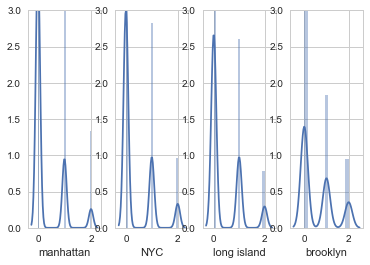

In [54]:
sns.distplot(X_train[X_train['city']=='Manhattan']['interest_level'],ax=plt.subplot(141));
plt.xlabel('manhattan');
axes=plt.gca()
axes.set_ylim([0,3])
sns.distplot(X_train[X_train['city']=='New York City']['interest_level'],ax=plt.subplot(142));
plt.xlabel('NYC');
axes=plt.gca()
axes.set_ylim([0,3])
sns.distplot(X_train[X_train['city']=='Long Island City']['interest_level'],ax=plt.subplot(143));
plt.xlabel('long island');
axes=plt.gca()
axes.set_ylim([0,3])
sns.distplot(X_train[X_train['city']=='Brooklyn']['interest_level'],ax=plt.subplot(144));
plt.xlabel('brooklyn');
axes=plt.gca()
axes.set_ylim([0,3])

(-74.05, -73.9)

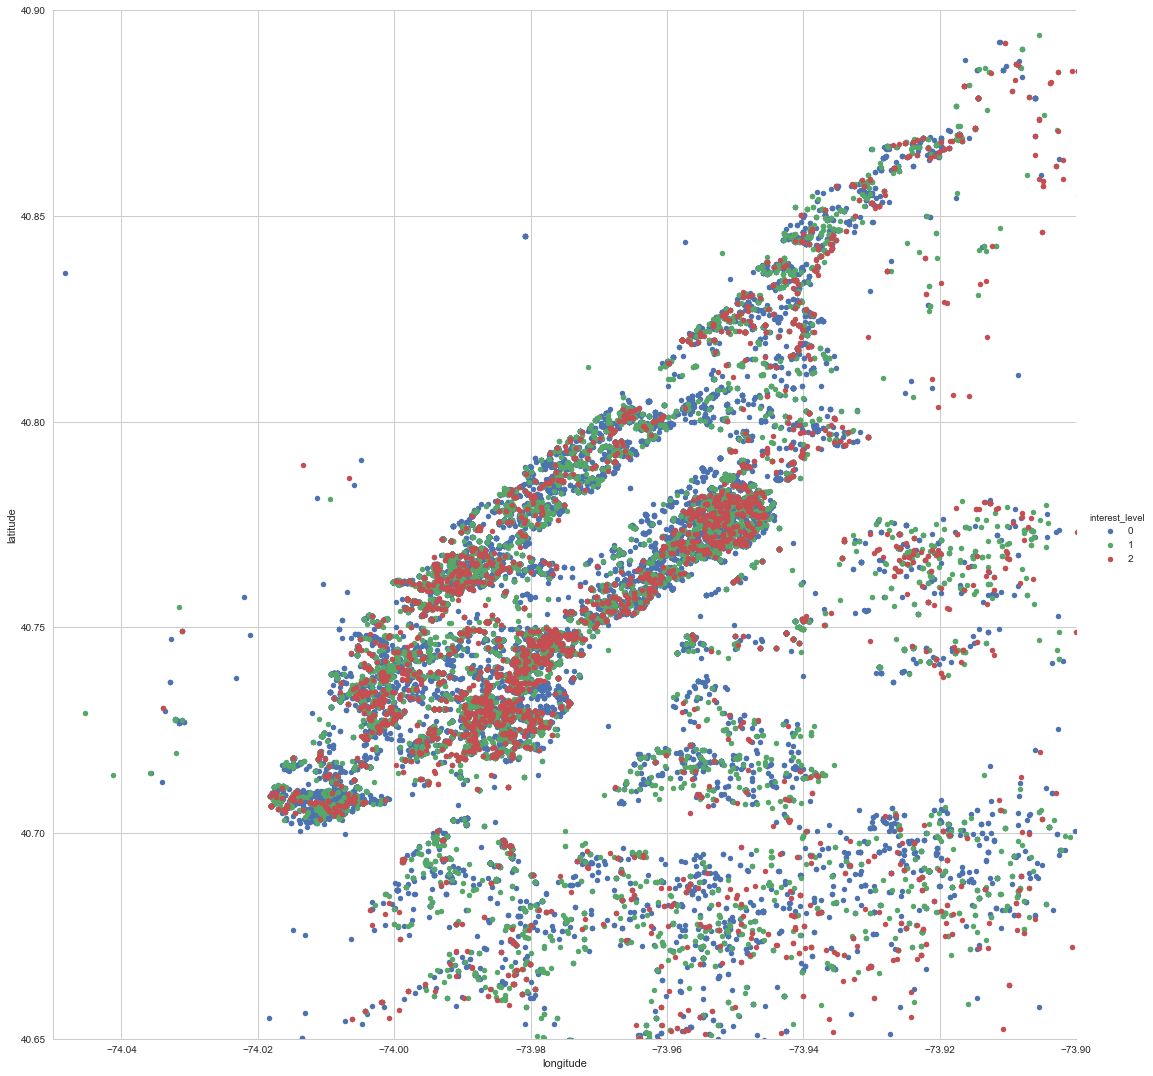

In [43]:
sns.lmplot(x="longitude", y="latitude", scatter_kws={'alpha':1,'s':30}, size=15, fit_reg=False, hue="interest_level",
           hue_order=[0,1,2], data=X_train[:].sample(frac=1))
axes=plt.gca()
# axes.set_ylim([40.70,40.82])
# axes.set_xlim([-74.02, -73.94])
axes.set_ylim([40.65,40.9])
axes.set_xlim([-74.05, -73.9])

In [14]:
def readDist(X=X_train, name='train'):
    df=pd.read_csv("countyNum_"+name+".csv")
    df.index=X.index
    X['countyNum']=df['countyNum']#.apply(lambda x: 2 if x>.2 else 0 if x<.015 else 1)
    del df
readDist(X_train, 'train')
readDist(X_test,'test')

In [15]:
df=pd.read_csv('Borough_County_train.csv')
print(len(df))
df.index=X_train[:df.shape[0]].index
df[X_train.columns]=X_train[:df.shape[0]][X_train.columns]

49352


In [17]:
b=df.groupby('county').count().sort(['latitude'])['latitude']
print(len(b))
print(b[-20:])
b=b.index

109
county
tribeca                 147
rose hill               156
queens                  161
diamond district        168
new york county         173
manhattanville          174
bronx                   185
east village            207
chelsea                 217
tudor city              375
midtown west            393
koreatown               560
battery park city       727
hell's kitchen          801
upper west side         965
southbridge towers     1100
queens county          1685
bk                     2045
kings county           2244
manhattan             35314
Name: latitude, dtype: int64


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


(-74.05, -73.9)

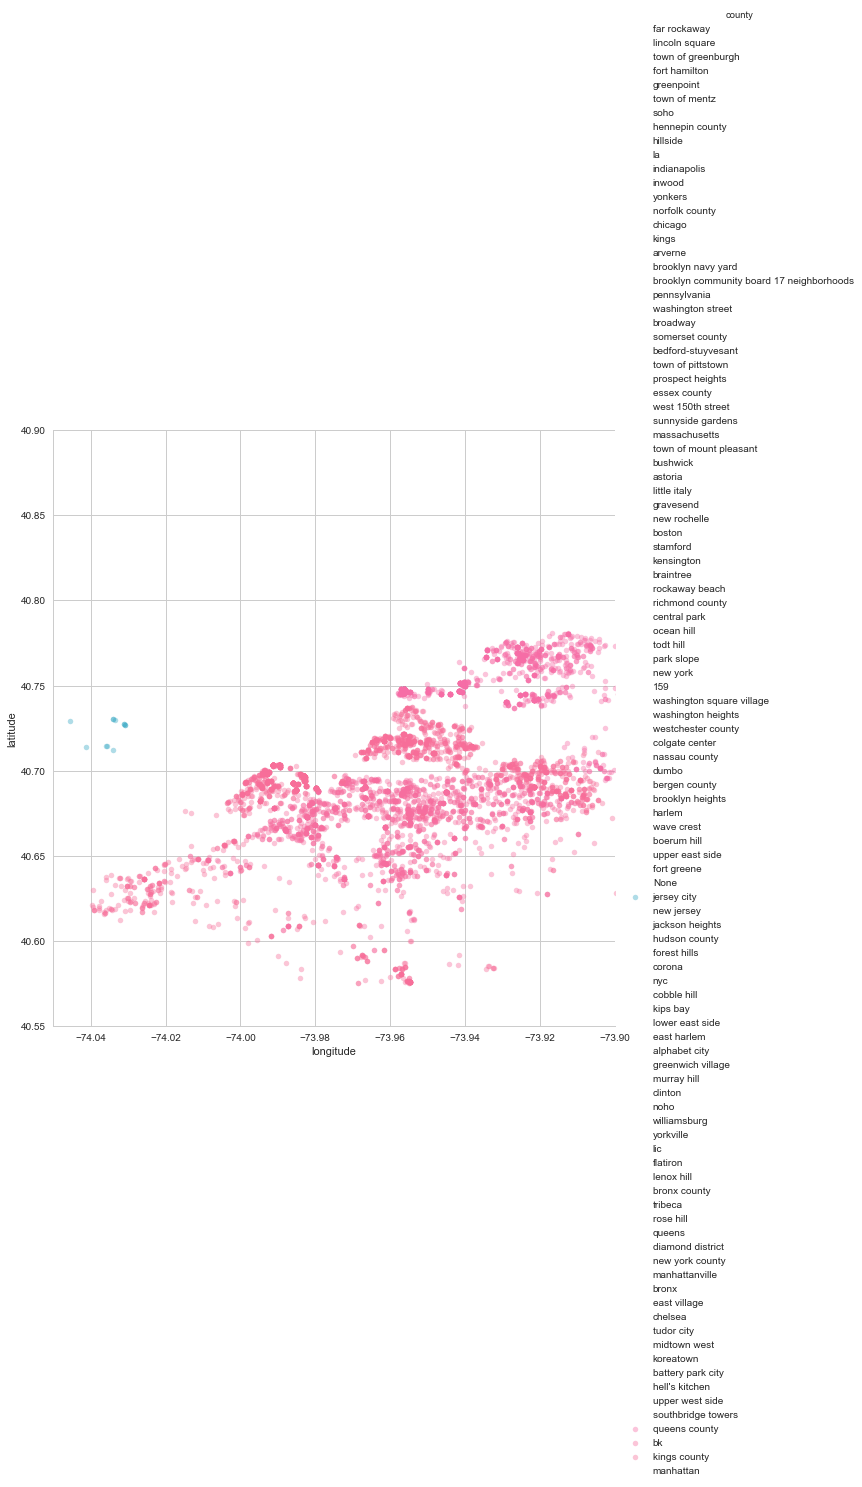

In [18]:
sns.lmplot(x="longitude", y="latitude", scatter_kws={'alpha':.4,'s':30}, \
           size=9, fit_reg=False, hue="county", hue_order=b[5:], \
           data=df[(df['county']=='bk')|(df['county']=='kings county')|(df['county']=='queens county')|
                  (df['county']=='jersey city')].sample(frac=1))
axes=plt.gca()
axes.set_ylim([40.55,40.9])
axes.set_xlim([-74.05, -73.9])

(-74.05, -73.9)

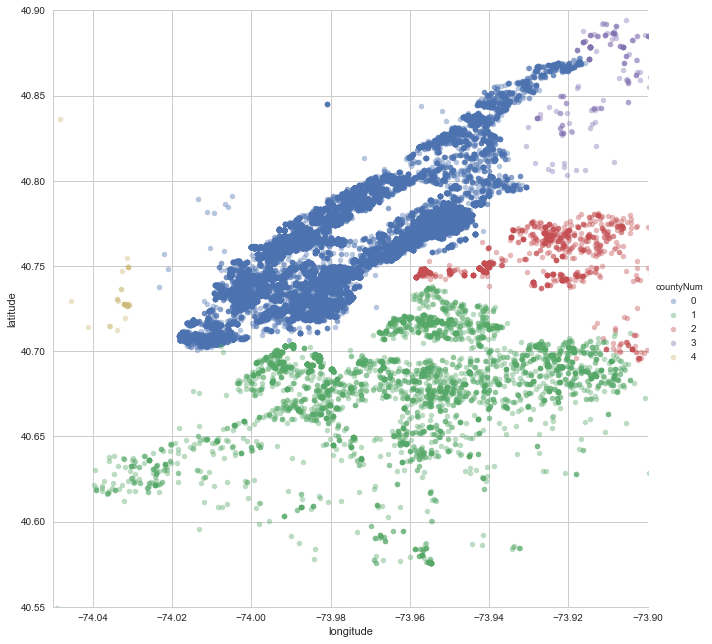

In [19]:
sns.lmplot(x="longitude", y="latitude", scatter_kws={'alpha':.4,'s':30}, \
           size=9, fit_reg=False, hue="countyNum", #hue_order=b[:], \
           data=df[:].sample(frac=1))
axes=plt.gca()
axes.set_ylim([40.55,40.9])
axes.set_xlim([-74.05, -73.9])

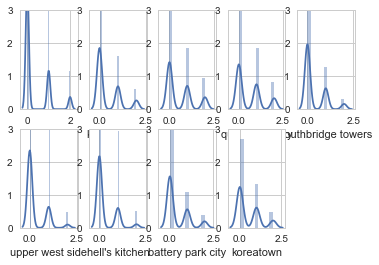

In [15]:
n=9
for i in np.arange(n):
    sns.distplot(df[df['county']==b[-(i+1)]]['interest_level'],ax=plt.subplot('2'+str((n+1)/2)+str(i+1)));
    plt.xlabel(b[-(i+1)]);
    axes=plt.gca()
    axes.set_ylim([0,3])

(-74.02, -73.9)

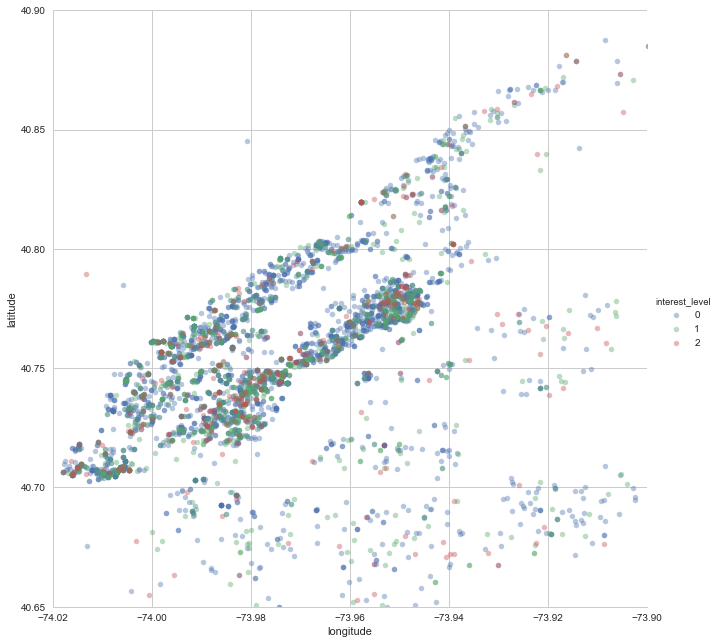

In [16]:
sns.lmplot(x="longitude", y="latitude", scatter_kws={'alpha':.4,'s':30}, \
           size=9, fit_reg=False, hue="interest_level", hue_order=[0,1,2], \
           data=df.sample(frac=.1))
axes=plt.gca()
axes.set_ylim([40.65,40.9])
axes.set_xlim([-74.02, -73.9])

In [19]:
b=df.groupby('borough').count().sort(['latitude'])['latitude']
print(len(b))
print(b[-50:])
b=b.index

527
borough
west 42nd street              159
8th avenue                    174
11th avenue                   184
crown heights                 186
washington street             199
10th avenue                   210
boerum hill                   213
6th avenue                    246
harlem                        247
clinton hill                  257
west 43rd street              261
park slope                    275
astoria                       277
inwood                        278
john street                   284
bedford-stuyvesant            288
morningside heights           310
koreatown                     321
midtown west                  332
bushwick                      377
lic                           393
wall street                   399
broadway                      407
lower east side               433
little italy                  439
clinton                       445
noho                          449
williamsburg                  490
washington square village     503
up

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


(-74.02, -73.9)

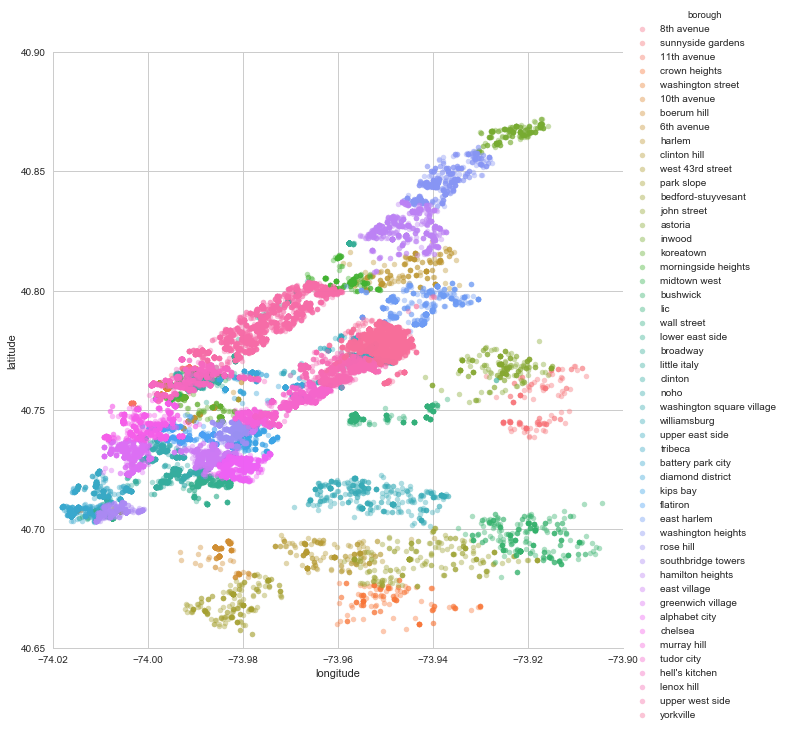

In [62]:
sns.lmplot(x="longitude", y="latitude", scatter_kws={'alpha':.4,'s':30}, \
           size=9, fit_reg=False, hue="borough", hue_order=b[-50:], \
           data=df.sample(frac=1))
axes=plt.gca()
axes.set_ylim([40.65,40.9])
axes.set_xlim([-74.02, -73.9])

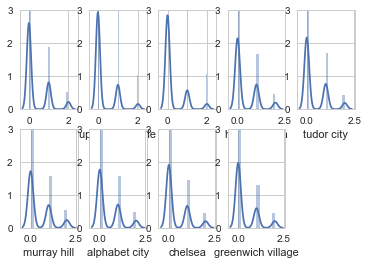

In [20]:
n=9
for i in np.arange(n):
    sns.distplot(df[df['borough']==b[-(i+1)]]['interest_level'],ax=plt.subplot('2'+str((n+1)/2)+str(i+1)));
    plt.xlabel(b[-(i+1)]);
    axes=plt.gca()
    axes.set_ylim([0,3])

In [31]:
df.groupby('countyNum').count().iloc[:,1]

countyNum
0    42352
1     4496
2     2085
3      375
4       44
Name: county, dtype: int64

In [32]:
df["num_photos"] = df["photos"].apply(len)
df["num_features"] = df["features"].apply(len)
df["num_description_words"] = df["description"].apply(lambda x: len(x.split(" ")))
df["created"] = pd.to_datetime(df["created"])
#df["created_year"] = df["created"].dt.year
df["created_month"] = df["created"].dt.month
#df["created_day"] = df["created"].dt.day
#df["created_hour"] = df["created"].dt.hour
#X['bedrooms'].ix[X['bedrooms']>=4] = 4

features_to_use = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
                   "num_photos", "num_features", "num_description_words",
                   #"created_year", 
                   "created_month", 
                   #"created_day",
                   "dist_to_subway"
                  ]



def preProcess(label='manager_id'):
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[label].values))
    df[label] = lbl.transform(list(df[label].values))

for i in ['manager_id','borough','countyNum'#,'city'
         ]:
    preProcess(i)
    features_to_use.append(i)

In [33]:
X = df[features_to_use]
y = df["interest_level"]
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.33, random_state=15)



In [34]:
def GetMean(X,name="manager_id"):
    temp = pd.concat([X[name],pd.get_dummies(ytrain)], axis = 1).groupby(name).mean()
    temp.columns = ['high_frac_'+name,'low_frac_'+name, 'medium_frac_'+name]
    temp['count'] = X.groupby(name).count().iloc[:,1]
    #print(temp.head(5))
    X = X.merge(temp.reset_index(),how='left', left_on=name, right_on=name)
    del temp
    X.index=Xtrain.index
    del X['count']
    return X

#Xtrain=GetMean(name='city', X=Xtrain)
Xtrain=GetMean(name='manager_id', X=Xtrain)
Xtrain=GetMean(name='borough', X=Xtrain)
Xtrain=GetMean(name='countyNum', X=Xtrain)
Xtrain.head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_month,dist_to_subway,...,countyNum,high_frac_manager_id,low_frac_manager_id,medium_frac_manager_id,high_frac_borough,low_frac_borough,medium_frac_borough,high_frac_countyNum,low_frac_countyNum,medium_frac_countyNum
24107,1.0,0,40.7074,-74.0069,2900,5,12,62,6,0.002043,...,0,0.600000,0.250000,0.150000,0.748503,0.202096,0.049401,0.715255,0.218382,0.066363
79783,1.0,0,40.7593,-73.9959,2650,4,5,117,5,0.006479,...,0,0.875000,0.125000,0.000000,0.623377,0.344156,0.032468,0.715255,0.218382,0.066363
51523,1.0,1,40.7197,-73.9600,2500,7,1,128,5,0.003940,...,1,1.000000,0.000000,0.000000,0.665680,0.266272,0.068047,0.623107,0.257406,0.119487
108802,1.0,2,40.7081,-74.0065,2650,8,7,91,4,0.001318,...,0,0.510638,0.393617,0.095745,0.639594,0.243655,0.116751,0.715255,0.218382,0.066363
74359,2.0,3,40.7496,-73.9820,5000,5,14,79,5,0.003520,...,0,0.600000,0.350000,0.050000,0.741935,0.211982,0.046083,0.715255,0.218382,0.066363


0.644010513279


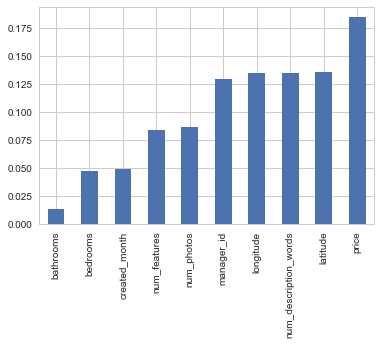

In [35]:
these_features = [f for f in features_to_use if f not in [#'manager_id', 
                                                          'countyNum',
                                                          'county','borough','city',\
                                                          'high_frac_manager_id',\
                                                          #'low_frac_manager_id', 'medium_frac_manager_id',
                                                          'high_frac_city','low_frac_city', 'medium_frac_city',
                                                          'high_frac_borough','low_frac_borough', 
                                                          'medium_frac_borough',
                                                          'high_frac_countyNum','low_frac_countyNum', 
                                                          'medium_frac_countyNum',
                                                          #'longitude', 'latitude',
                                                         'dist_to_subway']]

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(Xtrain[these_features], ytrain)
yval_pred = clf.predict_proba(Xval[these_features])
print(log_loss(yval, yval_pred))
pd.Series(index = these_features, data = clf.feature_importances_).sort_values().plot(kind = 'bar')

In [146]:
df['dist_to_subway']=X_train[:df.shape[0]]['dist_to_subway'].clip(.02,.3)

0.640911777185


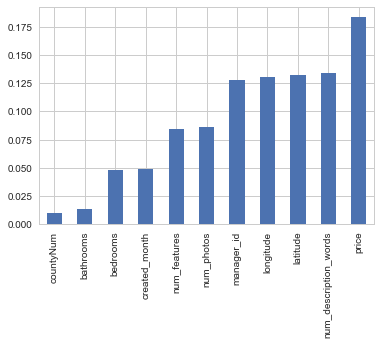

In [36]:
these_features = [f for f in features_to_use if f not in [#'manager_id','countyNum',
                                                          'county',
                                                          'borough','city',\
                                                          'high_frac_manager_id',\
                                                          #'low_frac_manager_id', 'medium_frac_manager_id',
                                                          'high_frac_city','low_frac_city', 'medium_frac_city',
                                                          'high_frac_borough','low_frac_borough', 
                                                          'medium_frac_borough',
                                                          #'high_frac_countyNum','low_frac_countyNum', 
                                                          'medium_frac_countyNum',
                                                          #'longitude', 'latitude',
                                                         'dist_to_subway']]

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(Xtrain[these_features], ytrain)
yval_pred = clf.predict_proba(Xval[these_features])
print(log_loss(yval, yval_pred))
pd.Series(index = these_features, data = clf.feature_importances_).sort_values().plot(kind = 'bar')

0.642085414469


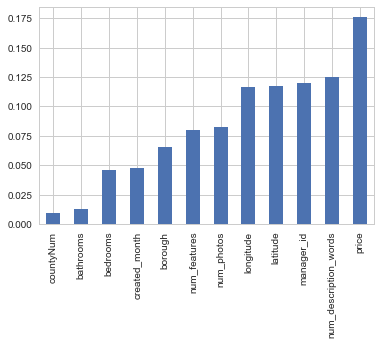

In [37]:
these_features = [f for f in features_to_use if f not in [#'manager_id',
                                                          'county',#'borough',
                                                          'city',\
                                                          'high_frac_manager_id',\
                                                          #'low_frac_manager_id', 'medium_frac_manager_id',
                                                          'high_frac_city','low_frac_city', 
                                                          'medium_frac_city',
                                                          #'high_frac_borough','low_frac_borough', 
                                                          'medium_frac_borough',
                                                          'high_frac_countyNum','low_frac_countyNum', 
                                                          'medium_frac_countyNum',
                                                          #'longitude', 'latitude',
                                                         'dist_to_subway']]

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(Xtrain[these_features], ytrain)
yval_pred = clf.predict_proba(Xval[these_features])
print(log_loss(yval, yval_pred))
pd.Series(index = these_features, data = clf.feature_importances_).sort_values().plot(kind = 'bar')

0.645239203549


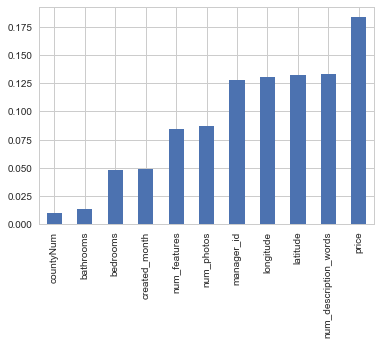

In [45]:
these_features = [f for f in features_to_use if f not in [#'manager_id',
                                                          #'countyNum',
                                                          'borough',
                                                          'city',\
                                                          'high_frac_manager_id',\
                                                          #'low_frac_manager_id', 'medium_frac_manager_id',
                                                          'high_frac_city','low_frac_city', 
                                                          'medium_frac_city',
                                                          #'high_frac_borough','low_frac_borough', 
                                                          'medium_frac_borough',
                                                          'high_frac_countyNum','low_frac_countyNum', 
                                                          'medium_frac_countyNum',
                                                          #'longitude', 'latitude',
                                                         'dist_to_subway']]

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(Xtrain[these_features], ytrain)
yval_pred = clf.predict_proba(Xval[these_features])
print(log_loss(yval, yval_pred))
pd.Series(index = these_features, data = clf.feature_importances_).sort_values().plot(kind = 'bar')

0.642173727432


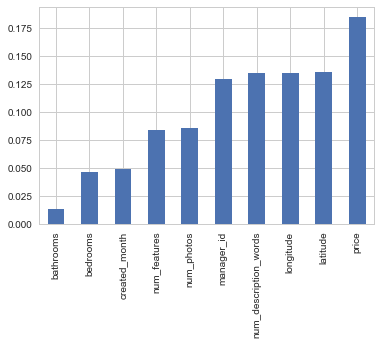

In [44]:
these_features = [f for f in features_to_use if f not in [#'manager_id',
                                                          'countyNum',
                                                          'county',
                                                          'borough',
                                                          'city',\
                                                          'high_frac_manager_id',\
                                                          #'low_frac_manager_id', 'medium_frac_manager_id',
                                                          'high_frac_city','low_frac_city', 
                                                          'medium_frac_city',
                                                          #'high_frac_borough','low_frac_borough', 
                                                          'medium_frac_borough',
                                                          'high_frac_countyNum','low_frac_countyNum', 
                                                          'medium_frac_countyNum',
                                                          #'longitude', 'latitude',
                                                           'dist_to_subway'
                                                          ]]

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(Xtrain[these_features], ytrain)
yval_pred = clf.predict_proba(Xval[these_features])
print(log_loss(yval, yval_pred))
pd.Series(index = these_features, data = clf.feature_importances_).sort_values().plot(kind = 'bar')

In [151]:
df['created_year'].unique()

array([2016])